In [1]:
import pandas as pd

uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula5.1/movies.csv"
movies = pd.read_csv(uri)
print("The columns of the dataset are:",movies.columns)
movies = movies.set_index("movieId")

# pandas.get_dummies
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
movies = movies.join(movies['genres'].str.get_dummies()).drop("genres", axis=1)
movies['year'] = movies['title'].str.extract(r',*\((\d+)\)')
movies = movies.dropna()
movies.head()

/usr/local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


The columns of the dataset are: Index(['movieId', 'title', 'genres'], dtype='object')


,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula5.1/ratings.csv"
ratings = pd.read_csv(uri)
rounded = ratings['rating'].round(1)
print("The columns of the dataset are:",ratings.columns)
ratings.head()

The columns of the dataset are: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
means = ratings.groupby('movieId')['rating'].mean().rename("mean")
#averages = pd.DataFrame(averages)

means = means.to_frame().reset_index().sort_values('movieId')
means.head(2)

,movieId,mean
0,1,3.920930
1,2,3.431818


In [9]:
movies = movies.merge(means, on='movieId', how='left')
movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,mean
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1995,3.920930
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,3.431818
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,3.259615
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,2.357143
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1995,3.071429


In [10]:
movies["mean_category"] = (movies['mean'].round()).values

In [11]:
movies.head(2)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,mean,mean_category
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1995,3.920930,4.0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,3.431818,3.0


In [32]:
total = ratings.groupby('movieId')['timestamp'].count()
movies = movies.join(total)
movies = movies.rename(columns={"timestamp" : "votes"})
movies = movies.query("votes > 50")
movies.sample(2)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,year,mean,mean_category,votes,votes
2947,3951,Two Family House (2000),0,0,0,0,0,0,0,0,...,0,0,0,0,0,2000,5.0,5.0,53.0,53
317,359,I Like It Like That (1994),0,0,0,0,0,1,0,0,...,1,0,0,0,0,1994,3.0,3.0,81.0,81


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe607f8de80>,
      dtype=object)

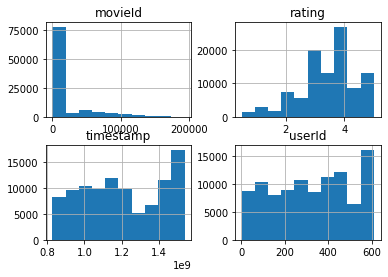

In [13]:
# Let us see histograms of all columns
ratings.hist()
# Some of them does not have meaning, for instance, the histogram of userId has no meaning
# But, histograms of ratings and timestamp have some intesresting information, specially rating

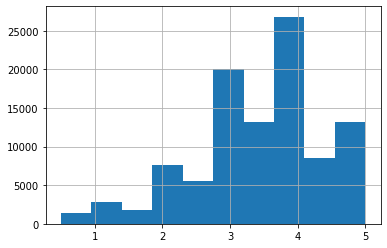

In [14]:
ratings['rating'].hist()

In [15]:
rounded.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

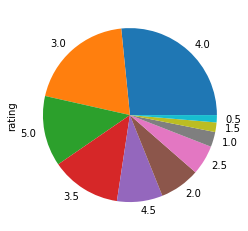

In [16]:
rounded.value_counts().plot.pie()

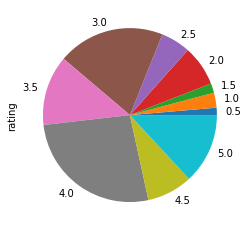

In [17]:
rounded.value_counts().to_frame().reset_index().sort_values('index').set_index('index')['rating'].plot.pie()

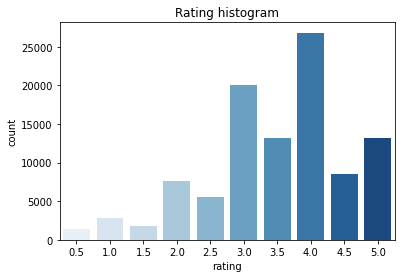

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# https://seaborn.pydata.org/tutorial/color_palettes.html
palette = sns.color_palette("Blues", 10)
sns.countplot(rounded, palette=palette)
plt.title("Rating histogram")
plt.show()

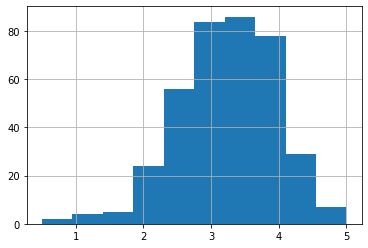

In [19]:
movies['mean'].hist()
plt.show()

In [20]:
movies.columns

Index(['movieId', 'title', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'year', 'mean',
       'mean_category', 'votes'],
      dtype='object')

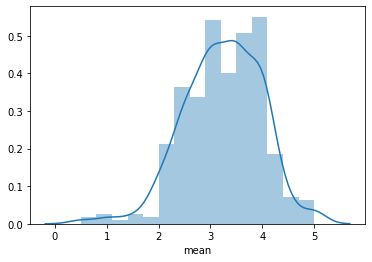

In [21]:
sns.distplot(movies['mean'])

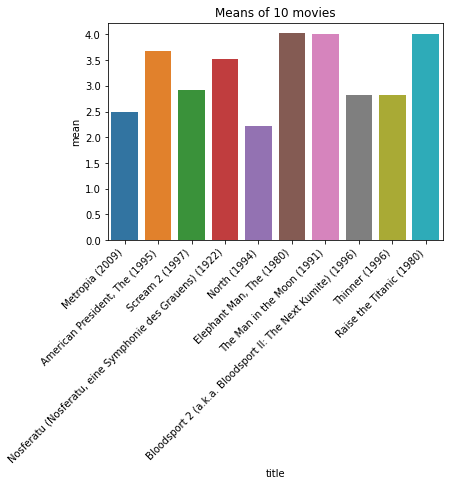

In [22]:
p = sns.barplot(data = movies.sample(10), x="title", y="mean")
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title("Means of 10 movies")
#plt.ylim(0, 5)
plt.show()
#movies.columns

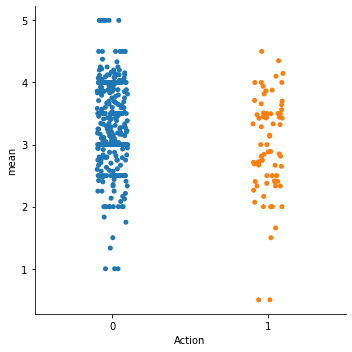

In [23]:
sns.catplot(data = movies, x="Action", y="mean")
plt.show()

[]

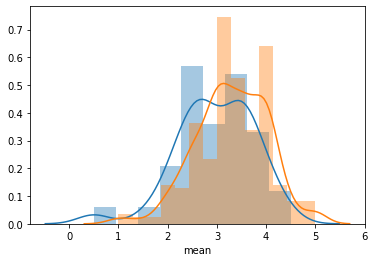

In [24]:
sns.distplot(movies.query("Action == 1")['mean'])
sns.distplot(movies.query("Action == 0")['mean'])
plt.plot()

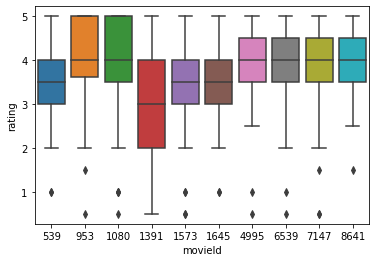

In [25]:
ids = ",".join(movies.sample(10).index.values.astype(str))
query = f"movieId in ({ids})"
sns.boxplot(data = ratings.query(query), x = "movieId", y="rating")

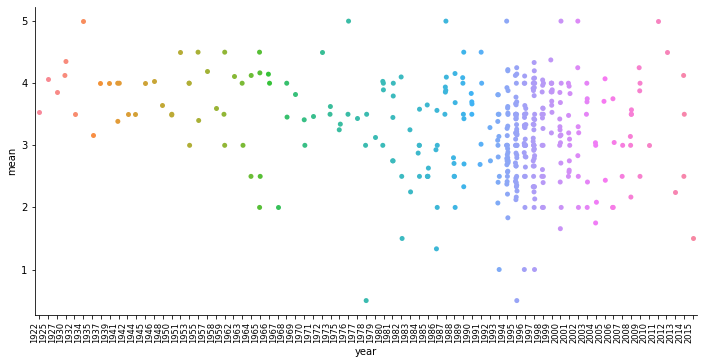

In [54]:
p = sns.catplot(data=movies, x="year", y="mean", aspect=2)
p.set_xticklabels(rotation = 90, horizontalalignment = 'right', fontsize='small')
plt.show()

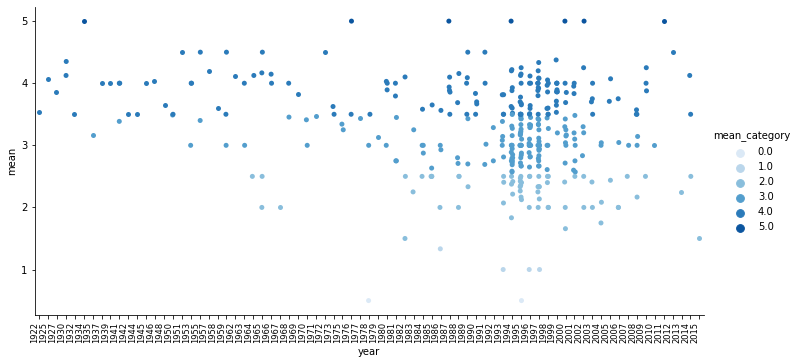

In [56]:
p = sns.catplot(data=movies, x="year", y="mean", hue="mean_category", palette = sns.color_palette("Blues", 6), aspect=2)
p.set_xticklabels(rotation = 90, horizontalalignment = 'right', fontsize='small')
plt.show()